In [1]:
#!conda install -c conda-forge/label/cf202003 wordcloud

In [55]:
import sys
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from collections import Counter
import advertools as adv

In [3]:
print(os.getcwd())

c:\Users\Nisa Ulumuddin\Documents\1_TechLabs_DS\HappyCook\wt21-happy-cook


In [4]:
#cd_recipe = pd.read_csv('ds_dataset/core-data_recipe.csv')
#cd_test_rating = pd.read_csv('ds_dataset/core-data-test_rating.csv')
#cd_train_rating = pd.read_csv('ds_dataset/core-data-train_rating.csv')
#cd_valid_rating = pd.read_csv('ds_dataset/core-data-valid_rating.csv')
rd_interaction = pd.read_csv('ds_dataset/raw-data_interaction.csv')
rd_recipe = pd.read_csv('ds_dataset/raw-data_recipe.csv')

## 2nd file: the recipe file 

There are 9 columns in this dataset...

In [8]:
print("There are {} recipes in this dataset".format(len(rd_recipe['recipe_id'].unique())))
rd_recipe.head(2)

There are 49698 recipes in this dataset


,recipe_id,recipe_name,aver_rate,image_url,review_nums,ingredients,cooking_directions,nutritions,reviews
0,222388,Homemade Bacon,5.000000,https://images.media-allrecipes.com/userphotos...,3,pork belly^smoked paprika^kosher salt^ground b...,{'directions': u'Prep\n5 m\nCook\n2 h 45 m\nRe...,"{u'niacin': {u'hasCompleteData': False, u'name...","{8542392: {'rating': 5, 'followersCount': 11, ..."
1,240488,"Pork Loin, Apples, and Sauerkraut",4.764706,https://images.media-allrecipes.com/userphotos...,29,sauerkraut drained^Granny Smith apples sliced^...,{'directions': u'Prep\n15 m\nCook\n2 h 30 m\nR...,"{u'niacin': {u'hasCompleteData': False, u'name...","{3574785: {'rating': 5, 'followersCount': 0, '..."


In [10]:
# a new dataframe was created here that correspond to the ingredient list in each recipe_id. but this is raw.
db_temp = rd_recipe["ingredients"].str.split('^',expand=True)
db_temp.insert(0,"recipe_id", rd_recipe["recipe_id"])
db_temp.set_index(keys="recipe_id",inplace=True)
db_temp.head(2)

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
recipe_id,,,,,,,,,,,,,,,,,,,,,
222388,pork belly,smoked paprika,kosher salt,ground black pepper,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
240488,sauerkraut drained,Granny Smith apples sliced,large onion,caraway seeds,apple cider divided,brown sugar,Rub:,Thai seasoning,salt,garlic powder,...,None,None,None,None,None,None,None,None,None,None


In [54]:
#creating a more refined table showing the counts of each ingredients

ingr_tuple = db_temp.to_records(index=True)
ingr_counter = Counter()
for idx in range(1,len(db_temp.columns)):
    ingr_counter.update(Counter(elem[idx] for elem in ingr_tuple))

db_ingr = pd.DataFrame.from_dict(ingr_counter, orient='index', columns = ['count'])
db_ingr = db_ingr[db_ingr.index.notnull()]

A new dataframe was created to show how many times an ingredient pops up in the dataset

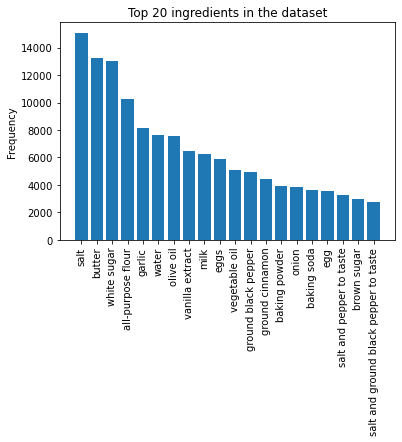

In [18]:
top_50_ingr = db_ingr.sort_values(by='count',ascending=False).head(20)
plt.bar(x=top_50_ingr.index, height=top_50_ingr['count'])
plt.xticks(rotation='vertical')
plt.title("Top 20 ingredients in the dataset")
plt.ylabel("Frequency")
plt.show()

We can see here that unsurprisingly, the top 20 ingredients are staple ingredients for many dishes. I assume that most people have these in their homes. We expect that users won't even bother to type these ingredients. We can also see overlaps in ingredients, "salt" "salt and pepper to taste", and "salt and ground black pepper to taste"

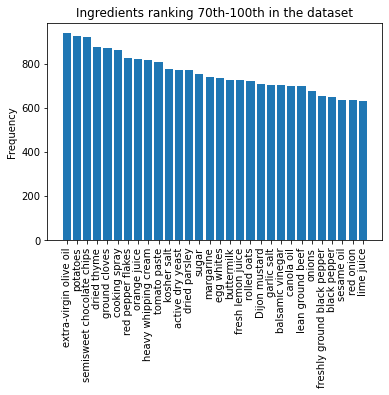

In [19]:
top_50_ingr = db_ingr.sort_values(by='count',ascending=False).iloc[70:100]
plt.bar(x=top_50_ingr.index, height=top_50_ingr['count'])
plt.xticks(rotation='vertical')
plt.title("Ingredients ranking 70th-100th in the dataset")
plt.ylabel("Frequency")
plt.show()

